r(t) = 9658.642432697694 km
phi(t) = 185.6675379411147 grados
Tiempo cuando r0 = 1.5 * R_earth: 2025-03-31 00:53:09


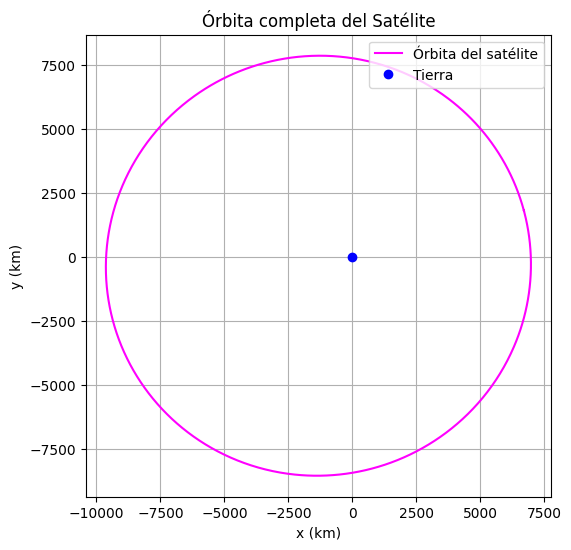

In [15]:

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Parámetros
R_earth = 6378.0  # km
GM = 398600.4405  # km^3/s^2
a = 1.30262 * R_earth  # km
e = 0.16561
omega_deg = 15.0  # grados
omega = np.radians(omega_deg)  # radianes
tp = datetime(2025, 3, 31, 0, 0, 0)

# Se realiza el método de bisección para resolver la ecuación de Kepler
def solve_kepler(M, e, tol=1e-10, max_iter=100):
    E_low, E_high = 0, 2 * np.pi
    for _ in range(max_iter):
        E_mid = (E_low + E_high) / 2
        f_mid = E_mid - e * np.sin(E_mid) - M
        if abs(f_mid) < tol:
            return E_mid
        if f_mid > 0:
            E_high = E_mid
        else:
            E_low = E_mid
    return E_mid


def parse_time(t_str):
    return datetime.strptime(t_str, "%Y-%m-%d %H:%M:%S")


def position(t_str):
    t = parse_time(t_str)
    delta_t = (t - tp).total_seconds()
    M = np.sqrt(GM / a**3) * delta_t  # anomalía media
    E = solve_kepler(M % (2*np.pi), e)
    f = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                       np.sqrt(1 - e) * np.cos(E / 2))
    r = a * (1 - e**2) / (1 + e * np.cos(f))
    phi = f + omega
    return r, np.degrees(phi) % 360

def orbit(num_points=1000):
    T = 2 * np.pi * np.sqrt(a**3 / GM)  # periodo orbital
    times = np.linspace(0, T, num_points)
    rs, phis = [], []

    for t_sec in times:
        l = np.sqrt(GM / a**3) * t_sec
        E = solve_kepler(l, e)
        f = eccentric_to_true_anomaly(E, e)
        phi = f + omega
        r = a * (1 - e**2) / (1 + e * np.cos(f))
        rs.append(r)
        phis.append(phi)

    xs = np.array(rs) * np.cos(phis)
    ys = np.array(rs) * np.sin(phis)

    plt.figure(figsize=(6, 6))
    plt.plot(xs, ys, label='Órbita del satélite', color='magenta')
    plt.plot([0], [0], 'o', color='blue', label='Tierra')
    plt.axis('equal')
    plt.title('Órbita completa del Satélite')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.grid()
    plt.legend(loc='upper right') 
    plt.show()



def date(r0, tol=1e-6):
    period = 2 * np.pi * np.sqrt(a**3 / GM)
    t_min, t_max = 0, period
    for _ in range(100):
        t_mid = (t_min + t_max) / 2
        t_probe = tp + timedelta(seconds=t_mid)
        r, _ = position(t_probe.strftime("%Y-%m-%d %H:%M:%S"))
        if abs(r - r0) < tol:
            return t_probe.strftime("%Y-%m-%d %H:%M:%S")
        if r > r0:
            t_max = t_mid
        else:
            t_min = t_mid
    return (tp + timedelta(seconds=t_mid)).strftime("%Y-%m-%d %H:%M:%S")

# Prueba
if __name__ == "__main__":
    r, phi = position("2025-04-01 00:00:00")
    print("r(t) =", r, "km")
    print("phi(t) =", phi, "grados")
    t0 = date(1.5 * R_earth)
    print("Tiempo cuando r0 = 1.5 * R_earth:", t0)
    orbit()



